In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
yesterday = '2018-12-31'

We first load the csv files and join sales and stores to create one large table that will allow us to aggregate city data further down the line:

In [3]:
# Load from csv
df_sales = pd.read_csv('../dataset/sales.csv',
                       delimiter=',', 
                       dtype={"product_id":"category", 
                              "store_id":"category",
                              "promo_type_1":"category",
                              "promo_bin_1":"category",
                              "promo_type_2":"category",
                              "promo_bin_2":"category",
                              "promo_discount_2":"category",
                              "promo_discount_type_2":"category"},
                       parse_dates=["date"])
df_stores = pd.read_csv('../dataset/store_cities.csv', 
                        delimiter=',', 
                        dtype={'store_id':'category',
                               'storetype_id':'category',
                               'city_id':'category'})
df_sales = df_sales.join(df_stores.set_index('store_id'), on='store_id')

We remove unwanted NAN values (these are created by stores obviously not containing data prior to their opening).

In [4]:
df_sales_clean = df_sales[['date','revenue','city_id']]
df_sales_clean['revenue'] = df_sales_clean['revenue'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We then group the data by city id and date, giving us daily revenue by city:

In [5]:
#daily_revenue_by_city = df_sales_clean.groupby(['city_id','hierarchy1_id','date'])['revenue'].agg('sum').reset_index()
daily_revenue_by_city = df_sales_clean.groupby(['city_id','date'])['revenue'].agg('sum')
daily_revenue_by_city  = daily_revenue_by_city.dropna()


We further aggregate the data to get monthly revenue data per city:

In [6]:
monthly_rev_by_city = daily_revenue_by_city.groupby([pd.Grouper(level='city_id'), 
                                                           pd.Grouper(freq='1M', level='date')]).sum()
monthly_rev_by_city = monthly_rev_by_city.reset_index()
monthly_rev_by_city = monthly_rev_by_city.dropna()

We can now compare the revenue of the last month with the month half a year ago

In [14]:
yesterday = '2018-12-31'

In [15]:
get_growth = monthly_rev_by_city
get_growth['revenue_past_halb_year'] = get_growth['revenue'].shift(6)
get_growth['half_year_increase'] = ((get_growth['revenue'] / get_growth['revenue_past_halb_year']) - 1) * 100
get_growth = get_growth.loc[get_growth.date == pd.to_datetime(yesterday, format='%Y-%m-%d')]
get_growth = get_growth.loc[get_growth.half_year_increase > 100]
growth_cities = get_growth['city_id'].tolist()
growth_values = get_growth['half_year_increase'].tolist()

The identified groth cities are now stored with the respectiv graph data and texts

In [33]:
res = {}
for i in range(len(growth_cities)):
    res[growth_cities[i]] = {}
    temp = monthly_rev_by_city
    temp = temp.loc[temp.city_id == growth_cities[i]]
    temp['date'] = pd.to_datetime(temp['date'], format='%Y-%m')
    temp = temp[['date', 'revenue']]
    temp = temp.loc[temp.date <= pd.to_datetime(yesterday, format='%Y-%m-%d')]
    temp['date'] = temp['date'].dt.strftime('%Y-%m')
    res[growth_cities[i]]["data"] = temp.to_numpy()
    res[growth_cities[i]]["text1"] = f"City {growth_cities[i]} increases the monthly revenue by {int(growth_values[i])} in the last 6 months"
    res[growth_cities[i]]["text2"] = f"Maybe expand further in this city"
    res[growth_cities[i]]["y_label"] = "Monthly Revenue"
    res[growth_cities[i]]["chart_type"] = 1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
res

{'C021': {'data': array([['2017-01', 4762.040000000001],
         ['2017-02', 3488.35],
         ['2017-03', 4506.759999999999],
         ['2017-04', 4135.82],
         ['2017-05', 4030.53],
         ['2017-06', 3730.5499999999997],
         ['2017-07', 3641.2099999999996],
         ['2017-08', 3721.2000000000003],
         ['2017-09', 4242.310000000001],
         ['2017-10', 4961.370000000001],
         ['2017-11', 3943.5],
         ['2017-12', 4639.68],
         ['2018-01', 4570.64],
         ['2018-02', 4424.040000000001],
         ['2018-03', 5482.039999999999],
         ['2018-04', 5287.589999999999],
         ['2018-05', 6047.01],
         ['2018-06', 3844.1600000000003],
         ['2018-07', 4245.11],
         ['2018-08', 4549.389999999999],
         ['2018-09', 9492.36],
         ['2018-10', 11533.89],
         ['2018-11', 9096.5],
         ['2018-12', 11984.94]], dtype=object),
  'text1': 'City C021 increases the monthly revenue by 211 in the last 6 months',
  'text2': 'Maybe 

Lets check the graph for one city

In [24]:
city = "C037"

In [25]:
temp = monthly_rev_by_city
temp = temp.loc[temp.city_id == city]
temp['date'] = pd.to_datetime(temp['date'], format='%Y-%m-%d')
temp = temp[['date', 'revenue']]
temp = temp.loc[temp.date <= pd.to_datetime(yesterday, format='%Y-%m-%d')]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


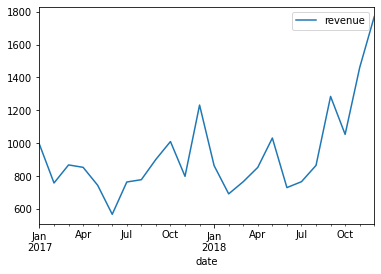

In [26]:
temp.plot(x='date')
plt.show()